In [61]:
import pandas as pd
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import confusion_matrix
from imblearn.metrics import classification_report_imbalanced

In [25]:
df = pd.read_csv(Path('ds_salaries.csv'))
df.tail()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
3750,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
3751,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
3752,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
3753,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L
3754,2021,SE,FT,Data Science Manager,7000000,INR,94665,IN,50,IN,L


In [26]:
year = df['work_year'].value_counts()

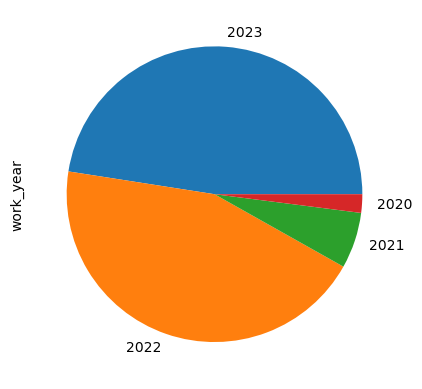

In [27]:
year_plot = year.plot.pie()

In [28]:
#There 4 different categories of the Experience level :-

#SE stands for 'Senior Executive'
#MI stands for 'Mid level/Intermediate'
#EN stands for "Enter Level"
#EX stands for "Executive level"
experience = df['experience_level'].value_counts()

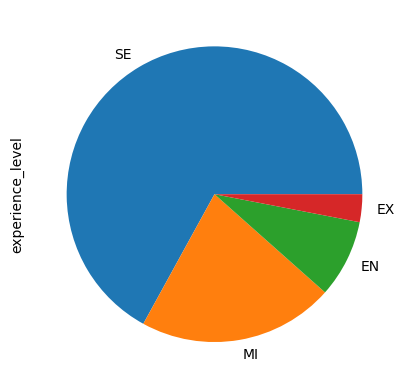

In [29]:
exp_plot = experience.plot.pie()

In [30]:
#The employment type is also divided into four different categories :-

#FT stands for "Full Time"
#CT stands for "Contract "
#FL stands for "Freelance "
#PT stands for "Partime"
employment = df['employment_type'].value_counts()

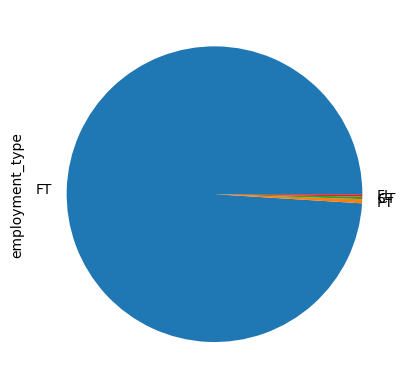

In [31]:
emp_plot = employment.plot.pie()

In [32]:
job = df['job_title'].value_counts()
top_10 = df['job_title'].value_counts()[:10]

In [33]:
job

Data Engineer                          1040
Data Scientist                          840
Data Analyst                            612
Machine Learning Engineer               289
Analytics Engineer                      103
                                       ... 
Principal Machine Learning Engineer       1
Azure Data Engineer                       1
Manager Data Management                   1
Marketing Data Engineer                   1
Finance Data Analyst                      1
Name: job_title, Length: 93, dtype: int64

<Axes: ylabel='job_title'>

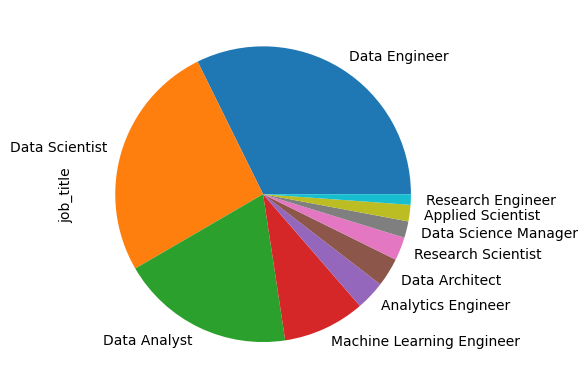

In [34]:
top_10.plot.pie()

In [35]:
residence = df['employee_residence'].value_counts()
top_10_r = df['employee_residence'].value_counts()[:7]

<Axes: ylabel='employee_residence'>

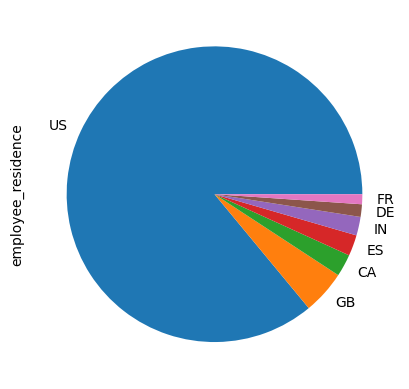

In [36]:
top_10_r.plot.pie()

In [37]:
#The company sizes depend on the number of employees they have.

#L stands for Large Companies which have employee count of less than 50.
#M stands for Medium Companies which have employee count of 50 to 249.
#L stands for Large Companies which have employee count higher than 250.
size = df['company_size'].value_counts()

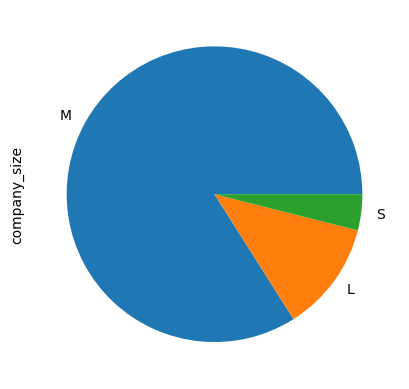

In [38]:
size_plot = size.plot.pie()

In [39]:
df.tail()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
3750,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
3751,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
3752,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
3753,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L
3754,2021,SE,FT,Data Science Manager,7000000,INR,94665,IN,50,IN,L


In [40]:
df.dtypes

work_year              int64
experience_level      object
employment_type       object
job_title             object
salary                 int64
salary_currency       object
salary_in_usd          int64
employee_residence    object
remote_ratio           int64
company_location      object
company_size          object
dtype: object

In [41]:
df = df.drop(['remote_ratio', 'salary', 'salary_currency'], axis=1)
df.head()

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,85847,ES,ES,L
1,2023,MI,CT,ML Engineer,30000,US,US,S
2,2023,MI,CT,ML Engineer,25500,US,US,S
3,2023,SE,FT,Data Scientist,175000,CA,CA,M
4,2023,SE,FT,Data Scientist,120000,CA,CA,M


In [48]:
categorical_variables = ['work_year', 'experience_level', 'employment_type', 'job_title', 'employee_residence','company_location','company_size']

In [49]:
enc = OneHotEncoder(sparse=False)

In [50]:
encoded_data = enc.fit_transform(df[categorical_variables])

C:\Users\vadik\Anaconda3\envs\dev\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [52]:
df_2 = pd.DataFrame(
    encoded_data,
    columns=enc.get_feature_names_out(categorical_variables)
)
df_2.head()

,work_year_2020,work_year_2021,work_year_2022,work_year_2023,experience_level_EN,experience_level_EX,experience_level_MI,experience_level_SE,employment_type_CT,employment_type_FL,...,company_location_SI,company_location_SK,company_location_TH,company_location_TR,company_location_UA,company_location_US,company_location_VN,company_size_L,company_size_M,company_size_S
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [53]:
df_3 = pd.concat([
    df["salary_in_usd"],
    df_2,
    
], axis=1)
df_3.head()

,salary_in_usd,work_year_2020,work_year_2021,work_year_2022,work_year_2023,experience_level_EN,experience_level_EX,experience_level_MI,experience_level_SE,employment_type_CT,...,company_location_SI,company_location_SK,company_location_TH,company_location_TR,company_location_UA,company_location_US,company_location_VN,company_size_L,company_size_M,company_size_S
0,85847,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,30000,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,25500,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,175000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,120000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [54]:
y = df_3['salary_in_usd']
y

0        85847
1        30000
2        25500
3       175000
4       120000
         ...  
3750    412000
3751    151000
3752    105000
3753    100000
3754     94665
Name: salary_in_usd, Length: 3755, dtype: int64

In [56]:
X = df_3.drop(columns='salary_in_usd')

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [65]:
#Model 1
number_input_features = 258
hidden_nodes_layer1 =  64
hidden_nodes_layer2 =  32
number_output_neurons = 1
nn = Sequential()
nn.add(Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))
nn.add(Dense(units=hidden_nodes_layer2, activation="relu"))
nn.add(Dense(units=number_output_neurons, activation="linear"))
nn.summary()
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
model = nn.fit(X_train, y_train, epochs=50, verbose=0)
model_loss, model_accuracy = nn.evaluate(X_test, y_test, verbose=0)

# Display the model loss and accuracy results
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 64)                16576     
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 18,689
Trainable params: 18,689
Non-trainable params: 0
_________________________________________________________________
Loss: -2090729.25, Accuracy: 0.0


In [66]:
#Model 2
number_input_features = 258
hidden_nodes_layer1 =  64
hidden_nodes_layer2 =  32
number_output_neurons = 1
nn = Sequential()
nn.add(Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))
nn.add(Dense(units=hidden_nodes_layer2, activation="relu"))
nn.add(Dense(units=number_output_neurons, activation="sigmoid"))
nn.summary()
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
model = nn.fit(X_train, y_train, epochs=50, verbose=0)
model_loss, model_accuracy = nn.evaluate(X_test, y_test, verbose=0)

# Display the model loss and accuracy results
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 64)                16576     
                                                                 
 dense_7 (Dense)             (None, 32)                2080      
                                                                 
 dense_8 (Dense)             (None, 1)                 33        
                                                                 
Total params: 18,689
Trainable params: 18,689
Non-trainable params: 0
_________________________________________________________________
Loss: -316998057984.0, Accuracy: 0.0


In [67]:
#Model 3
number_input_features = 258
hidden_nodes_layer1 =  64
hidden_nodes_layer2 =  32
number_output_neurons = 1
nn = Sequential()
nn.add(Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))
nn.add(Dense(units=hidden_nodes_layer2, activation="relu"))
nn.add(Dense(units=number_output_neurons, activation="linear"))
nn.summary()
nn.compile(loss="mean_absolute_error", optimizer="adam", metrics=["mse"])
model = nn.fit(X_train, y_train, epochs=50, verbose=0)
model_loss, model_accuracy = nn.evaluate(X_test, y_test, verbose=0)

# Display the model loss and accuracy results
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 64)                16576     
                                                                 
 dense_10 (Dense)            (None, 32)                2080      
                                                                 
 dense_11 (Dense)            (None, 1)                 33        
                                                                 
Total params: 18,689
Trainable params: 18,689
Non-trainable params: 0
_________________________________________________________________
Loss: 37902.99609375, Accuracy: 2722071552.0


In [68]:
#Model 4
number_input_features = 258
hidden_nodes_layer1 =  128
hidden_nodes_layer2 =  64
number_output_neurons = 1
nn = Sequential()
nn.add(Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))
nn.add(Dense(units=hidden_nodes_layer2, activation="relu"))
nn.add(Dense(units=number_output_neurons, activation="linear"))
nn.summary()
nn.compile(loss="mean_absolute_error", optimizer="adam", metrics=["mse"])
model = nn.fit(X_train, y_train, epochs=50, verbose=0)
model_loss, model_accuracy = nn.evaluate(X_test, y_test, verbose=0)

# Display the model loss and accuracy results
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 128)               33152     
                                                                 
 dense_13 (Dense)            (None, 64)                8256      
                                                                 
 dense_14 (Dense)            (None, 1)                 65        
                                                                 
Total params: 41,473
Trainable params: 41,473
Non-trainable params: 0
_________________________________________________________________
Loss: 36558.92578125, Accuracy: 2563077376.0


In [69]:
#Model 5
number_input_features = 258
hidden_nodes_layer1 =  256
hidden_nodes_layer2 =  128
number_output_neurons = 1
nn = Sequential()
nn.add(Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))
nn.add(Dense(units=hidden_nodes_layer2, activation="relu"))
nn.add(Dense(units=number_output_neurons, activation="linear"))
nn.summary()
nn.compile(loss="mean_absolute_error", optimizer="adam", metrics=["mse"])
model = nn.fit(X_train, y_train, epochs=50, verbose=0)
model_loss, model_accuracy = nn.evaluate(X_test, y_test, verbose=0)

# Display the model loss and accuracy results
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 256)               66304     
                                                                 
 dense_16 (Dense)            (None, 128)               32896     
                                                                 
 dense_17 (Dense)            (None, 1)                 129       
                                                                 
Total params: 99,329
Trainable params: 99,329
Non-trainable params: 0
_________________________________________________________________
Loss: 35974.87890625, Accuracy: 2478224128.0


In [70]:
#Model 6
number_input_features = 258
hidden_nodes_layer1 =  256
hidden_nodes_layer2 =  128
hidden_nodes_layer3 =  64
number_output_neurons = 1
nn = Sequential()
nn.add(Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))
nn.add(Dense(units=hidden_nodes_layer2, activation="relu"))
nn.add(Dense(units=hidden_nodes_layer3, activation="relu"))
nn.add(Dense(units=number_output_neurons, activation="linear"))
nn.summary()
nn.compile(loss="mean_absolute_error", optimizer="adam", metrics=["mse"])
model = nn.fit(X_train, y_train, epochs=50, verbose=0)
model_loss, model_accuracy = nn.evaluate(X_test, y_test, verbose=0)

# Display the model loss and accuracy results
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 256)               66304     
                                                                 
 dense_19 (Dense)            (None, 128)               32896     
                                                                 
 dense_20 (Dense)            (None, 64)                8256      
                                                                 
 dense_21 (Dense)            (None, 1)                 65        
                                                                 
Total params: 107,521
Trainable params: 107,521
Non-trainable params: 0
_________________________________________________________________
Loss: 35611.73828125, Accuracy: 2433414144.0


In [71]:
#Model 7
number_input_features = 258
hidden_nodes_layer1 =  512
hidden_nodes_layer2 =  256
hidden_nodes_layer3 =  128
number_output_neurons = 1
nn = Sequential()
nn.add(Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))
nn.add(Dense(units=hidden_nodes_layer2, activation="relu"))
nn.add(Dense(units=hidden_nodes_layer3, activation="relu"))
nn.add(Dense(units=number_output_neurons, activation="linear"))
nn.summary()
nn.compile(loss="mean_absolute_error", optimizer="adam", metrics=["mse"])
model = nn.fit(X_train, y_train, epochs=50, verbose=0)
model_loss, model_accuracy = nn.evaluate(X_test, y_test, verbose=0)

# Display the model loss and accuracy results
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_22 (Dense)            (None, 512)               132608    
                                                                 
 dense_23 (Dense)            (None, 256)               131328    
                                                                 
 dense_24 (Dense)            (None, 128)               32896     
                                                                 
 dense_25 (Dense)            (None, 1)                 129       
                                                                 
Total params: 296,961
Trainable params: 296,961
Non-trainable params: 0
_________________________________________________________________
Loss: 35678.0546875, Accuracy: 2422271232.0
